# Room modes

Sound that is reproduced in a closed enclosure like a room, can be proximated as a driven damped system. The room modes are the natural frequencies of the room and the sound we reproduce the exciter of these natural frequencies/modes

In [117]:
import matplotlib.pyplot as plt
import numpy as np

### define the dimensions of the room in meters

In [118]:
L = 5
W = 4
H = 3

### Define the first mode frequencies for all axial, tangetial, oblique modes

For that I will use the symbols that typically are used such as F100 (1st axial on the Length axis) or f110 (first tangential on the L/D plane)

_In the following array the first 3 items are the axial modes, then the tangential modes, and the one possible oblique mode._

In [119]:
# mode = [
#     [1, 0, 0],
#     [0, 1, 0],
#     [0, 0, 1],

#     [1, 1, 0],
#     [0, 1, 1],
#     [1, 0, 1],

#     [1, 1, 1]
# ]

mode = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
]

### Calculate the mode frequencies

In [120]:
# Function that calculates the frequency of each mode

def modeFrequency(L, W, H, mode):
    c = 343
    return (c/2) * np.sqrt( np.power((mode[0]/L),2) + np.power((mode[1]/W),2) + np.power((mode[2]/H),2) )

In [121]:
# Create a mode frequency array and calculate all mode frequencies

modeFrq = []

for m in mode:
    modeFrq.append(modeFrequency(L, W, H, m))

modeFrq = np.array(modeFrq)

### Calculate the frequency/amplitude curve (aka resonance curve)

In [122]:
# Define the frequency range in Hz
f = np.linspace(10, 2000, 10000)

# Define the function that calculates the resonance curve
def resonanceCurve(naturalFrequency, b ,m , frequencies):
    output = []
    
    for f in frequencies:
        output.append( 1 / np.sqrt( np.power(m, 2) * np.power( np.power(naturalFrequency, 2) - np.power(f, 2) , 2) + np.power(b*f,2)) )
    
    output = np.array(output)
    
    return output


In [123]:
# Calculate the resonance curves
resCurve = []

for mf in modeFrq:
    a = resonanceCurve(mf, 0.05, 0.004, f)
    resCurve.append(a/max(a))
    


###

Text(0, 0.5, 'Amplitude')

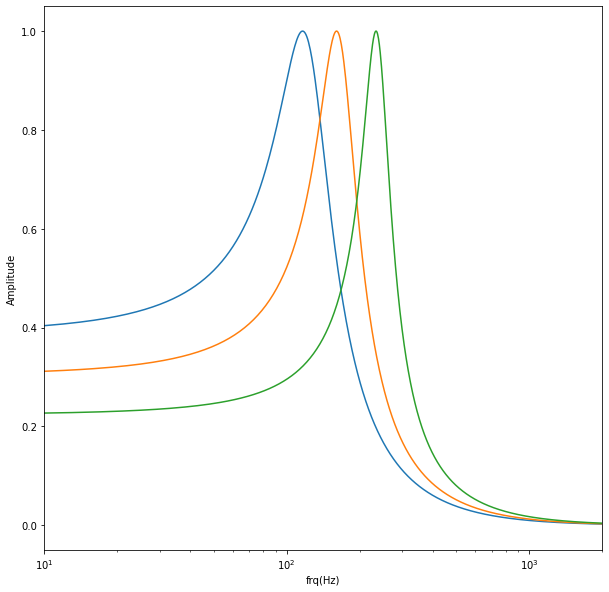

In [124]:

plt.figure(figsize=[10, 10])
plt.xlim(10, max(f))
for p in resCurve:
    plt.semilogx(p)

plt.xlabel("frq(Hz)")
plt.ylabel("Amplitude")